# Voltage Quality Estimation Model
 The quality of power supplied to end-use equipments depends upon the quality of voltage supplied by utility. Voltage is said to have quality if it has rated value at rated frequency without any distortion from sine wave. The normal voltage quality issues are:
- Voltage Sag
- Voltage Swell
- Voltage Flicker
- Voltage Harmonics
- Voltage Interruption

Estimation of voltage quality is a must for controllers to mitigate the issues using compensating device. Training data is generated by using functions which simulate the above voltage quality issues.

# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the dataset into the dataframe

In [2]:
data = pd.read_csv("Harmonic estimation.csv")

In [3]:
data.head()

,Sample,Voltage,3rd_Harmonic,5th_Harmonic,7th_Harmonic
0,1,202.708886,0.33,0.2,0.14
1,2,297.518396,0.33,0.2,0.14
2,3,279.793039,0.33,0.2,0.14
3,4,234.989843,0.33,0.2,0.14
4,5,233.752356,0.33,0.2,0.14


# Total no.of rows and columns

In [5]:
data.shape

(3996, 5)

# Checking the types of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sample        3996 non-null   int64  
 1   Voltage       3996 non-null   float64
 2   3rd_Harmonic  3996 non-null   float64
 3   5th_Harmonic  3996 non-null   float64
 4   7th_Harmonic  3996 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 156.2 KB


# Checking for duplicates

In [60]:
data.duplicated().sum()

2664

# Checking for missing values

In [61]:
data.isnull().sum()

Sample          0
Voltage         0
3rd_Harmonic    0
5th_Harmonic    0
7th_Harmonic    0
dtype: int64

# Statistical information describe

In [62]:
data.describe()

,Sample,Voltage,3rd_Harmonic,5th_Harmonic,7th_Harmonic
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,18.500000,-0.041577,0.395514,0.249054,0.171216
std,10.389595,265.847792,0.234057,0.147366,0.104449
min,1.000000,-647.476212,0.100000,0.060000,0.040000
25%,9.750000,-246.202096,0.230000,0.130000,0.100000
50%,18.500000,-0.545397,0.330000,0.210000,0.140000
75%,27.250000,246.087421,0.480000,0.330000,0.210000
max,36.000000,647.792327,0.950000,0.600000,0.420000


# Finding the outliers in numerical data

In [63]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [64]:
print(len(findoutliers(data.Sample))) # Number of rows having outlier

0


In [65]:
print(len(findoutliers(data.Voltage))) # Number of rows having outlier

0


# Visualising numerical data

(array([  42.,   75.,  717., 1014.,  150.,  150., 1020.,  711.,   75.,
          42.]),
 array([-6.47476212e+02, -5.17949358e+02, -3.88422504e+02, -2.58895650e+02,
        -1.29368796e+02,  1.58057600e-01,  1.29684912e+02,  2.59211765e+02,
         3.88738619e+02,  5.18265473e+02,  6.47792327e+02]),
 <BarContainer object of 10 artists>)

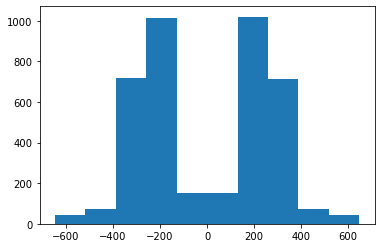

In [14]:
plt.hist(data.Voltage) # Continuous data

# Defining independent and dependent

In [15]:
X = data.iloc[:,:-3]
y = data.iloc[:,-3:]

# Spliting the data into training and testing data

In [18]:
x_train, x_test, y_train, y_test = train_test_split( X, y, train_size = 0.6, random_state = 23)

# Linear Regression

In [19]:
model_lr = LinearRegression()

# Training the model

In [20]:
model_lr.fit(x_train,y_train)

LinearRegression()

# Testing the model

In [21]:
y_predict_lr = model_lr.predict(x_test)

In [22]:
mean_squared_error(y_test,y_predict_lr)

0.028198969530229188

In [23]:
r2_lr = r2_score(y_test,y_predict_lr)
r2_lr

-0.0018914629025059693

In [24]:
mae_lr = mean_absolute_percentage_error(y_test,y_predict_lr)
mae_lr

0.6450804103319643

# Ridge Regression

In [25]:
model_rr = Ridge()

# Training the model

In [26]:
model_rr.fit(x_train,y_train)

Ridge()

# Testing the model

In [27]:
y_predict_rr = model_rr.predict(x_test)

In [28]:
mean_squared_error(y_test,y_predict_rr)

0.02819896882398042

In [29]:
r2_rr = r2_score(y_test,y_predict_rr)
r2_rr

-0.0018914376812056617

In [30]:
mae_rr = mean_absolute_percentage_error(y_test,y_predict_rr)
mae_rr

0.6450804074956995

# Lasso Regression

In [31]:
model_ll = Lasso()

# Training the model

In [32]:
model_ll.fit(x_train,y_train)

Lasso()

# Testing the model

In [33]:
y_predict_ll = model_ll.predict(x_test)

In [34]:
mean_squared_error(y_test,y_predict_ll)

0.02814644689551486

In [35]:
r2_ll = r2_score(y_test,y_predict_ll)
r2_ll

-2.898877905980572e-05

In [36]:
mae_ll = mean_absolute_percentage_error(y_test,y_predict_ll)
mae_ll

0.6448717457912431

# Decision Tree

In [37]:
model_dt = DecisionTreeRegressor()

# Training the model

In [38]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [39]:
y_predict_dt = model_dt.predict(x_test)

In [40]:
mean_squared_error(y_test,y_predict_dt)

0.0008741402908067542

In [41]:
r2_dt = r2_score(y_test,y_predict_dt)
r2_dt

0.968481175751074

In [42]:
mae_dt = mean_absolute_percentage_error(y_test,y_predict_dt)
mae_dt

0.029731996302399505

# Random Forest

In [43]:
model_rf = RandomForestRegressor()

# Training the model

In [44]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

# Testing the model

In [45]:
y_predict_rf = model_rf.predict(x_test)

In [46]:
mean_squared_error(y_test,y_predict_rf)

0.0011012516142863869

In [47]:
r2_rf = r2_score(y_test,y_predict_rf)
r2_rf

0.9597627398883278

In [48]:
mae_rf = mean_absolute_percentage_error(y_test, y_predict_rf)
mae_rf

0.077611578410057

# Model Evaluation

In [49]:
Mean_Absolute_Percentage_Error = [mae_lr,mae_rr,mae_ll,mae_dt,mae_rf]
R2_Score = [r2_lr,r2_rr,r2_ll,r2_dt,r2_rf]
Models = ['Linear Regression', ' Ridge Regression' , ' Lasso Regression',
          'Decision Tree', 'Random Forest']

# Mean Absolute Percentage Error Comparison Chart

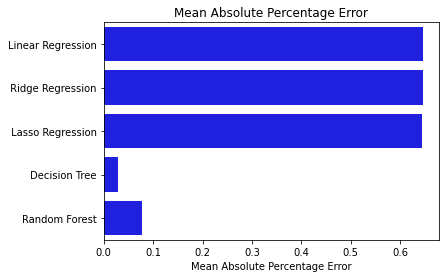

In [50]:
sn.barplot(Mean_Absolute_Percentage_Error, Models, color="b")
plt.xlabel('Mean Absolute Percentage Error')
plt.title('Mean Absolute Percentage Error')
plt.show()

# R2 Score Comparison Chart

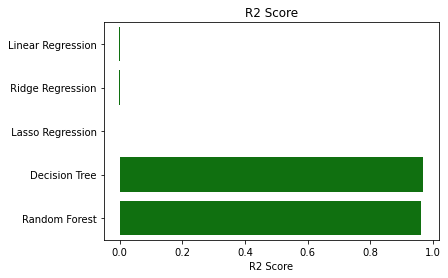

In [51]:
sn.barplot(R2_Score, Models, color="g")
plt.xlabel('R2 Score')
plt.title('R2 Score')
plt.show()

From the charts it can be seen that the Mean Absolute Percentage Error is lowest for decision tree and the R2 Score is highest for decision tree. Therefore, we can conclude that decision tree is the best algorithm for this data. 

# Hyperparameter Tuning (using grid search)

In [52]:
parameters = {'max_depth':[15,20,25,30,35,10,27,40,45,50],
              'random_state': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators':[100,150,200,250,300,350,90,80,70,50]}

grid = GridSearchCV(model_rf,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 30, 35, 10, 27, 40, 45, 50],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 90, 80,
                                          70, 50],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14]},
             verbose=1)

In [53]:
grid.best_score_

0.9969627871510992

In [54]:
grid.best_params_

{'max_depth': 35, 'n_estimators': 300, 'random_state': 7}

# Training Random Forest with best parameters

In [55]:
model_rf = RandomForestRegressor(n_estimators=90,max_depth=25,random_state=7)
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=90, random_state=7)

# Testing Random Forest with best parameters

In [56]:
y_predict_rf = model_rf.predict(x_test)

In [57]:
r2_score(y_test,y_predict_rf)

0.9593421335413886

In [58]:
mean_absolute_percentage_error(y_test, y_predict_rf)

0.07725930214725499

In [59]:
out = model_dt.predict([[1,194.8273663]])
out

array([[0.31 , 0.19 , 0.133]])